In [28]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
from dmba import plotDecisionTree, classificationSummary, regressionSummary


In [29]:

# Q1. 
# Read UniversalBank.csv file and store it into universal_df
# 
# Your code here
universal_df=pd.read_csv('UniversalBank.csv')
#---------------


In [30]:
# delete ID and Zip.Code columns. We are not going to use them for our analysis 
universal_df = universal_df.drop(['ID', 'ZIP Code'], axis=1)

# preview universal.df
universal_df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [31]:
# set CreditCard to categorical variable
universal_df = universal_df.astype({'Personal Loan': 'category'})
universal_df.dtypes


Age                      int64
Experience               int64
Income                   int64
Family                   int64
CCAvg                  float64
Education                int64
Mortgage                 int64
Personal Loan         category
Securities Account       int64
CD Account               int64
Online                   int64
CreditCard               int64
dtype: object

In [32]:
from sklearn.model_selection import train_test_split

X = universal_df.drop(columns=['Personal Loan'])
y = universal_df['Personal Loan']


In [33]:
## Partitioning 
#---------------
# Q2. Set seed number so that you can get the same traing and test set whenever you create them. 
# Q3. Create train_X, train_y (60%) and test_X and test_y(40%) with universalNormX

# Your code here  
#---------------
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

## Running decision tree
# Start with an initial guess for parameters
param_grid = { 'max_depth': [10, 20, 30, 40],
               'min_samples_split': [20, 40, 60, 80, 100], 
               'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01],
             } 



In [35]:
gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=5, n_jobs=-1) 
# n_jobs=-1 will utilize all available CPUs
gridSearch.fit(train_X, train_y)
print('Initial score: ', gridSearch.best_score_)
print('Initial parameters: ', gridSearch.best_params_)



Initial score:  0.9876666666666667
Initial parameters:  {'max_depth': 10, 'min_impurity_decrease': 0.0005, 'min_samples_split': 20}


In [36]:
gridSearch.fit(test_X, test_y)
print('Initial test score: ', gridSearch.best_score_)
print('Initial test parameters: ', gridSearch.best_params_)

Initial test score:  0.982
Initial test parameters:  {'max_depth': 10, 'min_impurity_decrease': 0.0005, 'min_samples_split': 20}


In [37]:
from dmba import classificationSummary

# fine-tuned tree: training
classificationSummary(train_y, gridSearch.predict(train_X))

# fine-tuned tree: test
classificationSummary(test_y, gridSearch.predict(test_X))


Confusion Matrix (Accuracy 0.9833)

       Prediction
Actual    0    1
     0 2694   19
     1   31  256
Confusion Matrix (Accuracy 0.9900)

       Prediction
Actual    0    1
     0 1801    6
     1   14  179


In [ ]:
#Adapt grid

In [38]:
# Adapt grid based on result from initial grid search
param_grid = { 'max_depth': list(range(2, 20)), 
               'min_samples_split': list(range(15, 25)), 
               'min_impurity_decrease': [0.0009, 0.001, 0.0011], 
             } 
gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Improved score: ', gridSearch.best_score_)
print('Improved parameters: ', gridSearch.best_params_)
bestClassTree = gridSearch.best_estimator_


Improved score:  0.9873333333333333
Improved parameters:  {'max_depth': 4, 'min_impurity_decrease': 0.0011, 'min_samples_split': 15}


In [39]:
bestClassTree

DecisionTreeClassifier(max_depth=4, min_impurity_decrease=0.0011,
                       min_samples_split=15, random_state=1)

In [40]:
import pydotplus

In [41]:
import os
os.environ['PATH'] += os.pathsep + 'C:\ProgramData\Anaconda3\Lib\site-packages\pydotplus'

In [42]:
from dmba import plotDecisionTree

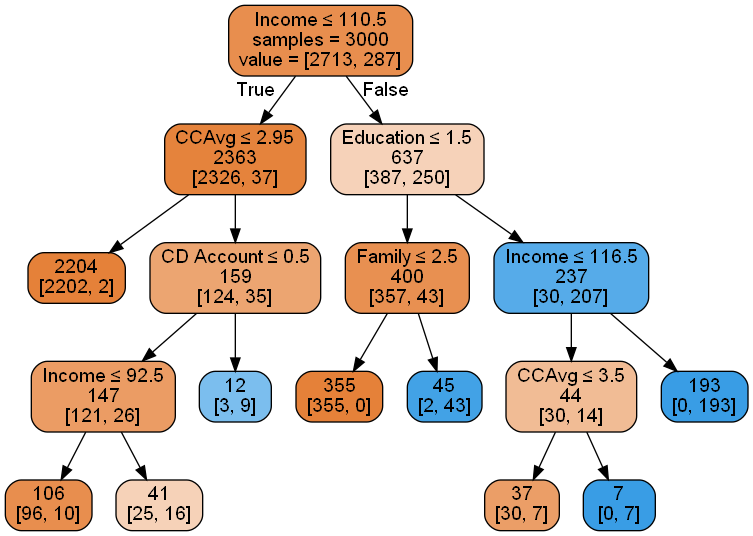

In [43]:

# plot the tree
plotDecisionTree(bestClassTree, feature_names=train_X.columns)


In [44]:
from dmba import classificationSummary

# fine-tuned tree: training
classificationSummary(train_y, bestClassTree.predict(train_X))

# fine-tuned tree: test
classificationSummary(test_y, bestClassTree.predict(test_X))


Confusion Matrix (Accuracy 0.9867)

       Prediction
Actual    0    1
     0 2708    5
     1   35  252
Confusion Matrix (Accuracy 0.9815)

       Prediction
Actual    0    1
     0 1801    6
     1   31  162


In [45]:
#---------------
# Q4. What is the error rate, false positive rate, 
# and false negative rate from the confusion matrix of test set?
# Is there any sign of overfitting?
# 
# Your answer here

#Train set과 Test set 의 Error rate 차이가 없는 것으로 보아 overfitting 문제는 없는 것 같다
Err_train=(5+35)/(2708+5+35+252)
print('train set 의 error rate :{}'.format(Err_train))
FPR_train=5/(5+2708)
print('train set 의 FPR :{}'.format(FPR_train))
FNR_train=35/(35+252)
print('train set 의 FNR :{}'.format(FNR_train))

Err_test=(6+31)/(1801+6+31+162)
print('test set 의 error rate :{}'.format(Err_test))
FPR_test=6/(6+1801)
print('test set 의 FPR :{}'.format(FPR_test))
FNR_test=31/(31+162)
print('test set 의 FNR :{}'.format(FNR_test))



train set 의 error rate :0.013333333333333334
train set 의 FPR :0.0018429782528566164
train set 의 FNR :0.12195121951219512
test set 의 error rate :0.0185
test set 의 FPR :0.003320420586607637
test set 의 FNR :0.16062176165803108


In [46]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier

## Running random forest, tuning 전
rf = RandomForestClassifier(n_estimators=500, random_state=1)
rf.fit(train_X, train_y)



RandomForestClassifier(n_estimators=500, random_state=1)

In [53]:
from sklearn.ensemble import RandomForestClassifier
#Best Parameter
param_grid = {"n_estimators" :[150,200, 250, 500],
              'max_depth': list(range(2, 20)), 
               'min_samples_split': list(range(15, 25)), 
               'min_impurity_decrease': [0.0009, 0.001, 0.0011]}

rf_grid_search = GridSearchCV(estimator=RandomForestClassifier(),
                              param_grid=param_grid, 
                              cv=5, verbose=2, n_jobs=-1)

rf_grid_search.fit(train_X, train_y)
print('RF score: ', rf_grid_search.best_score_)
print('RF parameters: ', rf_grid_search.best_params_)
best_RF_Tree=rf_grid_search.best_estimator_

Fitting 5 folds for each of 2160 candidates, totalling 10800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   36.1s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed: 15.4min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 19.3min
[Parallel(n_jobs=-1)]: Done 4893 tasks      | elapsed: 23.5min
[Parallel(n_jobs=-1)]: Done 5824 tasks      | elapsed: 28.2min
[Parallel(n_jobs=-1)]: Done 6837 tasks      | elapsed: 33.1min
[Parallel(n_jobs=-1)]: Done 7930 tasks      | elapsed: 38.5min
[Parallel(n_jobs=-1)]: Done 9105 tasks      | 

RF score:  0.9723333333333333
RF parameters:  {'max_depth': 11, 'min_impurity_decrease': 0.0009, 'min_samples_split': 18, 'n_estimators': 150}


In [54]:
best_RF_Tree

RandomForestClassifier(max_depth=11, min_impurity_decrease=0.0009,
                       min_samples_split=18, n_estimators=150)

In [55]:
# fine-tuned tree: training
classificationSummary(train_y, best_RF_Tree.predict(train_X))

# fine-tuned tree: test
classificationSummary(test_y, best_RF_Tree.predict(test_X))

Confusion Matrix (Accuracy 0.9740)

       Prediction
Actual    0    1
     0 2713    0
     1   78  209
Confusion Matrix (Accuracy 0.9650)

       Prediction
Actual    0    1
     0 1807    0
     1   70  123


In [56]:
from sklearn.metrics         import accuracy_score, confusion_matrix, roc_curve, auc

In [57]:
rf_grid_search.pred=rf_grid_search.predict(test_X)
accuracy = accuracy_score(test_y, rf_grid_search.pred)
print("Accuracy :", accuracy)

Accuracy : 0.965


               feature  importance       std
7   Securities Account    0.003964  0.004998
9               Online    0.006394  0.005350
10          CreditCard    0.007678  0.007053
6             Mortgage    0.034243  0.023469
1           Experience    0.035539  0.016061
0                  Age    0.036258  0.015858
8           CD Account    0.057917  0.043185
3               Family    0.111375  0.053146
4                CCAvg    0.172105  0.103011
5            Education    0.200772  0.101002
2               Income    0.333756  0.129227


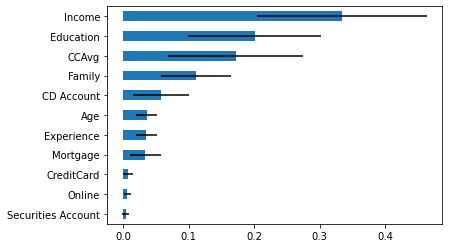

In [58]:
# variable (feature) importance plot
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
df = pd.DataFrame({'feature': train_X.columns, 'importance': importances, 'std': std})
df = df.sort_values('importance' )
print(df)

ax=df.plot(kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('')
plt.show()


In [27]:
# confusion matrix for validation set (RF)
classificationSummary(test_y, rf.predict(test_X))
classificationSummary(test_y, rf_grid_search.predict(test_X))

#---------------
# Q5. What is the performance of Random Forest?
# Is it better than Decision Tree?
# Which variables seem more important?
# 
# Your answer here

#기본 decision tree의 test set의 정확도가 0.99로 adapt grid 방법 및 Random forest 방법보다 더 정확도가 뛰어나서 decision tree 
#방법론이 가장 fit 한 모델로 판단했다.
#RF Model의 경우 feature의 중요성의 경우 위의 표와 같이 income이 가장 높았고, 
#그 다음 Education, 가장 낮은 중요성의 feature는 securities account였다
#---------------


Confusion Matrix (Accuracy 0.9820)

       Prediction
Actual    0    1
     0 1803    4
     1   32  161
Confusion Matrix (Accuracy 0.9815)

       Prediction
Actual    0    1
     0 1802    5
     1   32  161
